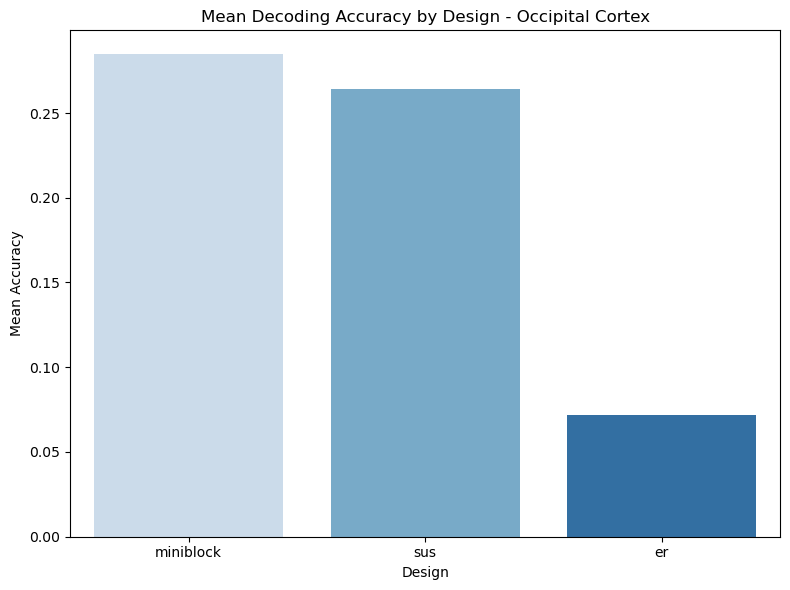

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io
import os

# Define the designs and subjects
designs = ['miniblock', 'sus', 'er']
subjects = ['01', '02', '03', '04', '05', '06', '07', '08', '10', '11', '12', '13', '14', '15', '17', '18', '19']
basedir = '/Users/danieljanini/Documents/Thesis/miniblock/Outputs'
output_dir = 'Occipital'

# Store accuracy results by design
accuracies = {design: [] for design in designs}

# Loop through all designs and subjects to calculate accuracy
for design in designs:
    for subject in subjects:
        directory = os.path.join(basedir, 'decoding', 'ROI', output_dir, design, f'sub-{subject}')
        conf_matrix_path = os.path.join(directory, 'confusion_matrix.mat')

        # Check if the confusion matrix file exists
        if os.path.exists(conf_matrix_path):
            # Load the matrix from the .mat file
            mat = scipy.io.loadmat(conf_matrix_path)
            conf_matrix = mat['M']  # Assuming 'M' is the matrix you saved
            
            # Calculate accuracy
            accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)
            accuracies[design].append(accuracy)

# Calculate the mean accuracy for each design
mean_accuracies = {design: np.mean(accuracies[design]) for design in designs}

# Plot the mean accuracy per design
plt.figure(figsize=(8,6))
sns.barplot(x=list(mean_accuracies.keys()), y=list(mean_accuracies.values()), palette='Blues', hue = list(mean_accuracies.keys()), legend = False)
plt.title("Mean Decoding Accuracy by Design - Occipital Cortex")
plt.xlabel("Design")
plt.ylabel("Mean Accuracy")
plt.tight_layout()
plt.show()




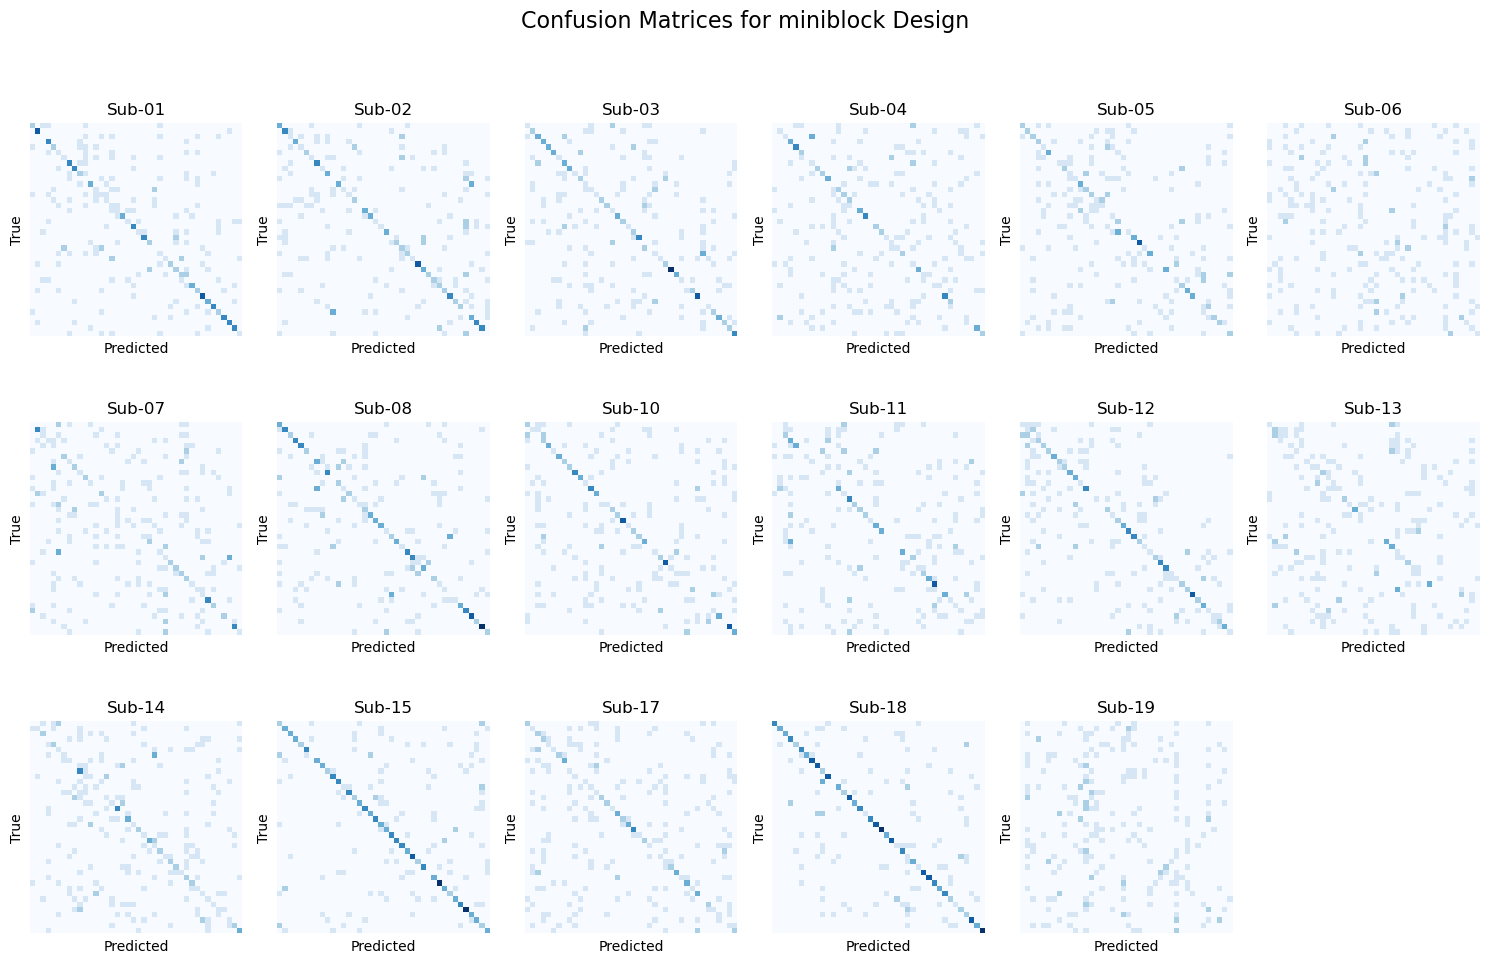

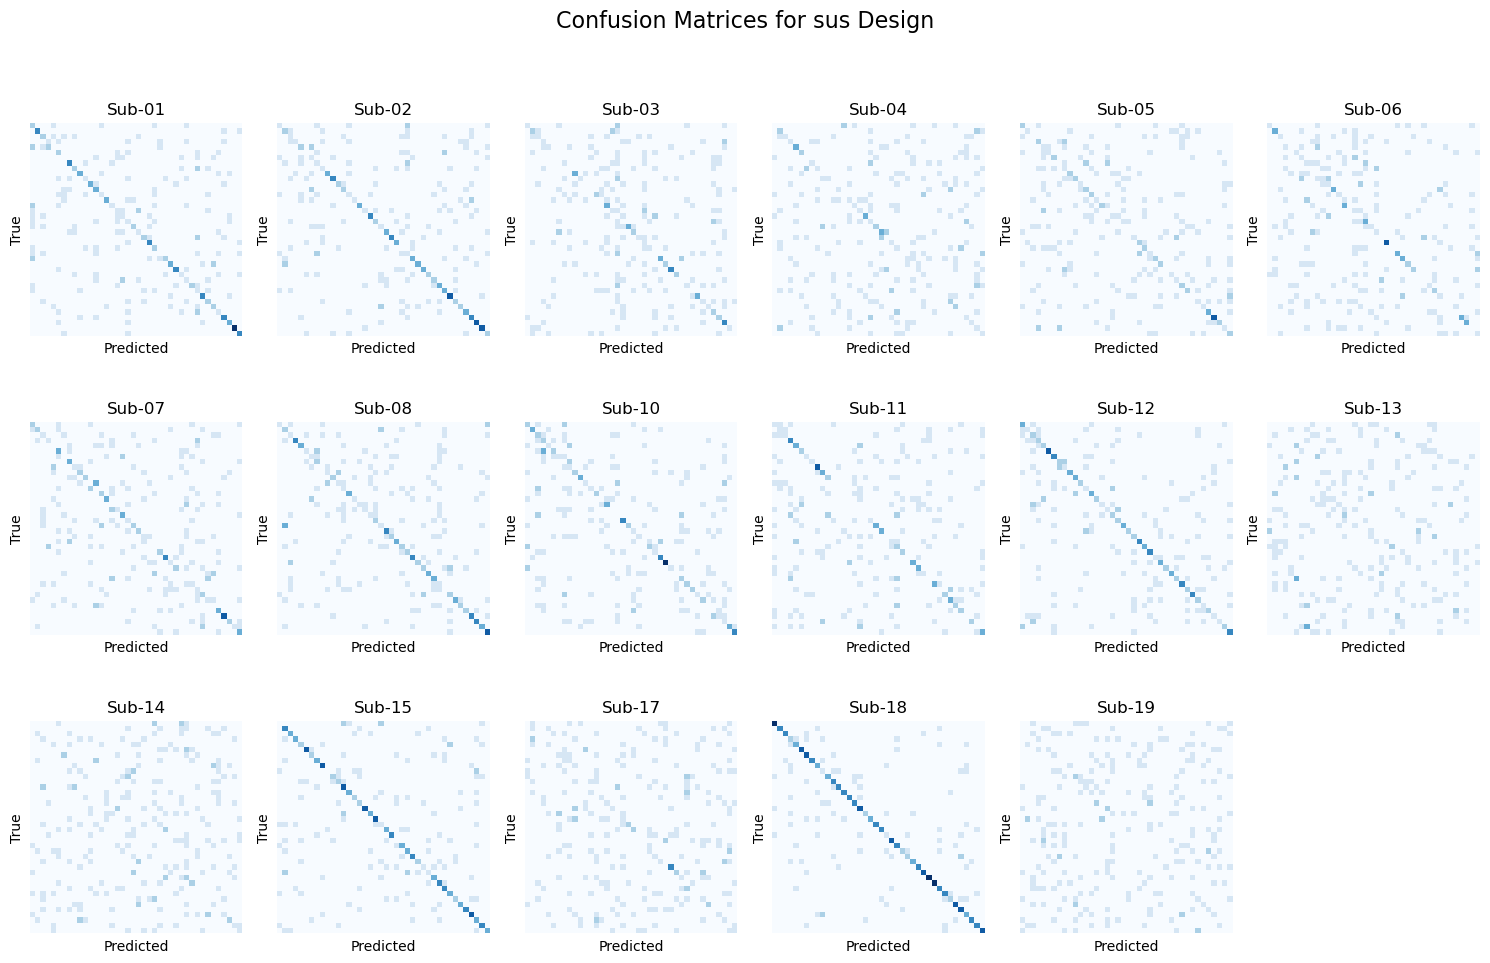

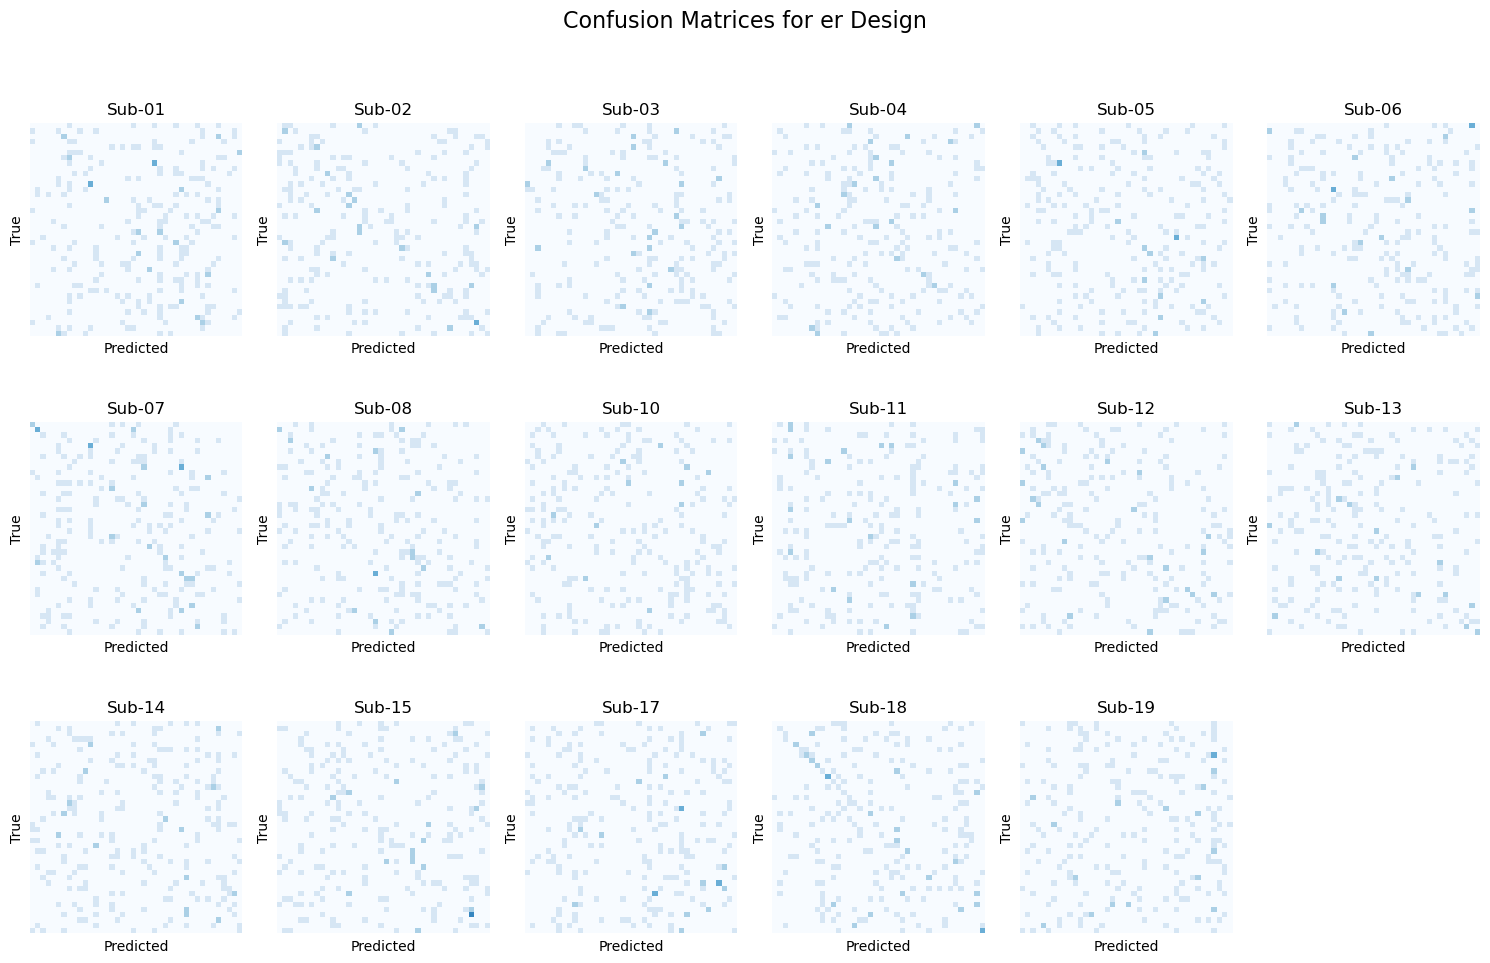

In [2]:
import numpy as np
import scipy.io
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Define the designs and subjects
designs = ['miniblock', 'sus', 'er']
subjects = ['01', '02', '03', '04', '05', '06', '07', '08', '10', '11', '12', '13', '14', '15', '17', '18', '19']
basedir = '/Users/danieljanini/Documents/Thesis/miniblock/Outputs'
output_dir = 'Occipital'

# Initialize variables to store the global min and max values
global_min = float('inf')
global_max = float('-inf')

# First loop: Calculate global min and max values
for design in designs:
    for subject in subjects:
        directory = os.path.join(basedir, 'decoding', 'ROI', output_dir, design, f'sub-{subject}')
        conf_matrix_path = os.path.join(directory, 'confusion_matrix.mat')
        
        if os.path.exists(conf_matrix_path):
            # Load the matrix from the .mat file
            mat = scipy.io.loadmat(conf_matrix_path)
            conf_matrix = mat['M']  # Assuming 'M' is the matrix you saved
            
            # Update global min and max values
            global_min = min(global_min, np.min(conf_matrix))
            global_max = max(global_max, np.max(conf_matrix))

# Now, plot the confusion matrices with consistent color scale
for design in designs:
    # Create a new figure for each design
    plt.figure(figsize=(15, 10))
    
    # Create subplots (3 rows, 6 columns)
    n_cols = 6
    n_rows = len(subjects) // n_cols + (1 if len(subjects) % n_cols else 0)
    
    # Loop over each subject to plot their confusion matrix
    for i, subject in enumerate(subjects):
        directory = os.path.join(basedir, 'decoding', 'ROI', output_dir, design, f'sub-{subject}')
        conf_matrix_path = os.path.join(directory, 'confusion_matrix.mat')

        if os.path.exists(conf_matrix_path):
            # Load the matrix from the .mat file
            mat = scipy.io.loadmat(conf_matrix_path)
            conf_matrix = mat['M']  # Assuming 'M' is the matrix you saved
            
            # Create subplot for each subject
            ax = plt.subplot(n_rows, n_cols, i+1)
            sns.heatmap(conf_matrix, annot=False, cmap="Blues", cbar=False, 
                        square=True, ax=ax, vmin=global_min, vmax=global_max)
            plt.title(f"Sub-{subject}")
            plt.xlabel("Predicted")
            plt.ylabel("True")
            plt.xticks([], [])  # Hide x-axis ticks
            plt.yticks([], [])  # Hide y-axis ticks
            
            # Add the color bar to each subplot
            cbar = ax.collections[0].colorbar
    
    plt.suptitle(f"Confusion Matrices for {design} Design", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust space to make room for title
    plt.show()


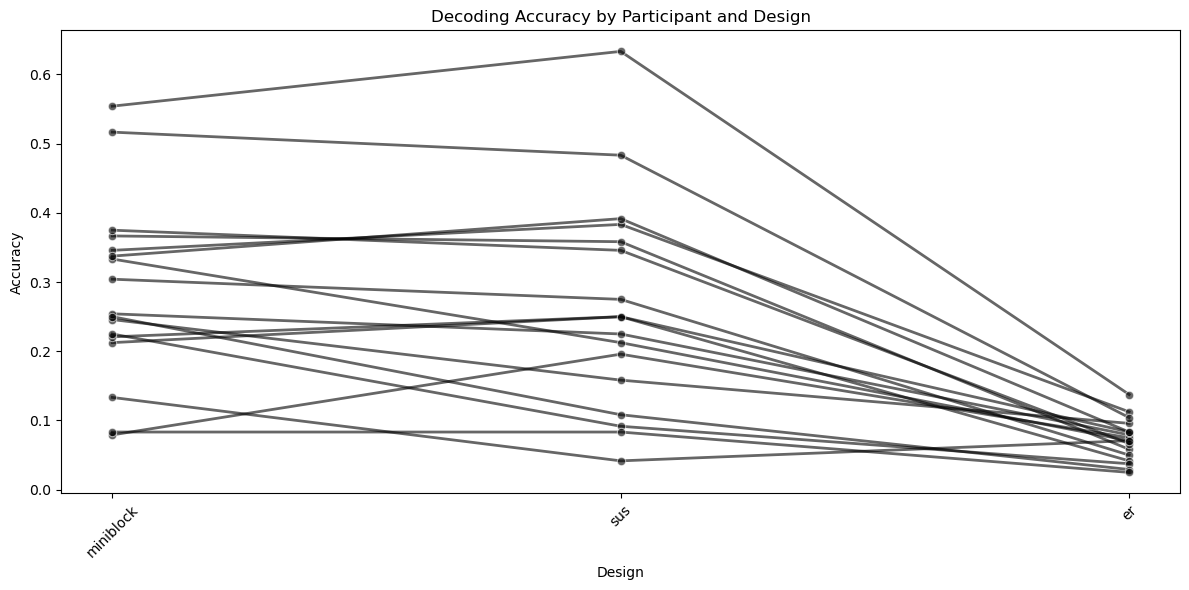

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare summary data
summary_data = []
for design in designs:
    for subject in subjects:
        if len(accuracies[design]) > 0:
            acc = accuracies[design][subjects.index(subject)]  # Get accuracy for this design and subject
            summary_data.append({"subject": subject, "design": design, "accuracy": acc})

# Create DataFrame from the summary data
df = pd.DataFrame(summary_data)

# Plot spaghetti plot (lines connecting each participant's accuracy across designs)
plt.figure(figsize=(12,6))
for subj, group in df.groupby('subject'):
    sns.lineplot(data=group, x='design', y='accuracy',
                 marker='o', color='black', linewidth=2, alpha=0.6)

plt.title("Decoding Accuracy by Participant and Design")
plt.xlabel("Design")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
